In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r"E:\Python Pr\wine quality\datasets_35901_52633_winequalityN.csv")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
print(df.shape)
print(df.head())

(6497, 13)
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  


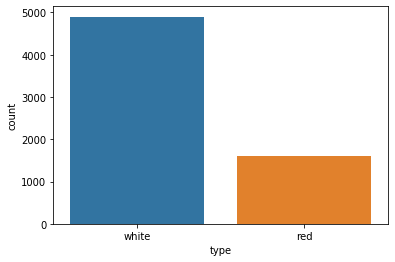

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [3]:
sns.countplot(df['type'])
plt.show()
print(df.isnull().sum())
print(df.dtypes)

In [4]:
nalist=[i for i in df.columns if df.isnull().sum()[i]>0]
print(nalist)

for i in nalist:
    df[i]=df[i].fillna(df[i].mean())

print(df.isnull().sum().sum())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'pH', 'sulphates']
0


In [12]:
X=df.drop('type',axis=1)
y=df['type']
w=y
y=pd.get_dummies(y)
y=y.iloc[:,0].values



In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [16]:
#Logistic Regression

lr=LogisticRegression(random_state=1051,penalty='l2')
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print(accuracy_score(y_pred_lr,y_test))
print(confusion_matrix(y_pred_lr,y_test)) 


0.9746153846153847
[[968  26]
 [  7 299]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
print(accuracy_score(y_pred_dt,y_test))
print(confusion_matrix(y_pred_dt,y_test)) 


0.9853846153846154
[[966  10]
 [  9 315]]


In [18]:
#KNN

knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print(accuracy_score(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test)) 

0.943076923076923
[[945  44]
 [ 30 281]]


In [19]:
#GaussianNB

nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)
print(accuracy_score(y_pred_nb,y_test))
print(confusion_matrix(y_pred_nb,y_test)) 

0.9669230769230769
[[945  13]
 [ 30 312]]
